<a href="https://colab.research.google.com/github/Sathvik2954/Infosys_Edu2Job_Predicting_Job_Roles_from_Educational_Background/blob/main/EDA__Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving roo_data.csv to roo_data.csv


Dataset loaded successfully!

Original Data Head:
   Acedamic percentage in Operating Systems  percentage in Algorithms  \
0                                        69                        63   
1                                        78                        62   
2                                        71                        86   
3                                        76                        87   
4                                        92                        62   

   Percentage in Programming Concepts  Percentage in Software Engineering  \
0                                  78                                  87   
1                                  73                                  60   
2                                  91                                  87   
3                                  60                                  84   
4                                  90                                  67   

   Percentage in Computer Networks  Percentage i

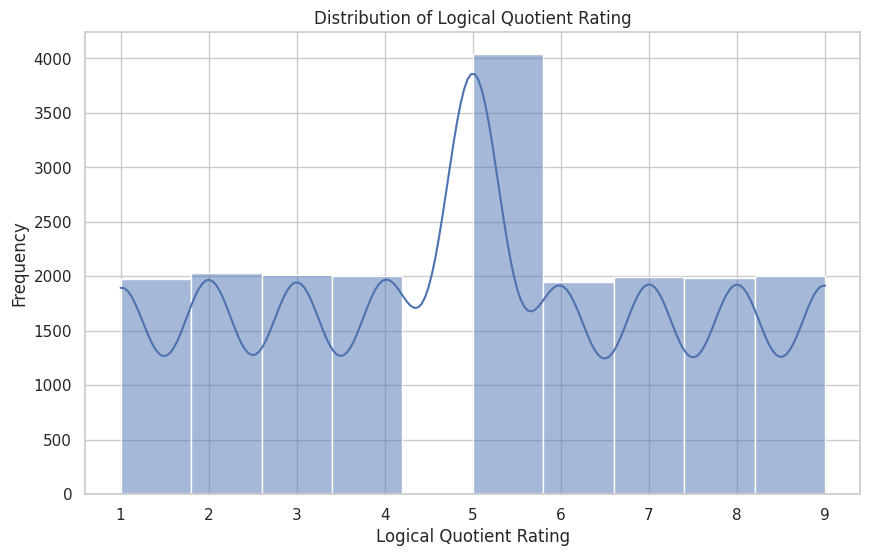


Generated histogram for 'Logical quotient rating'.


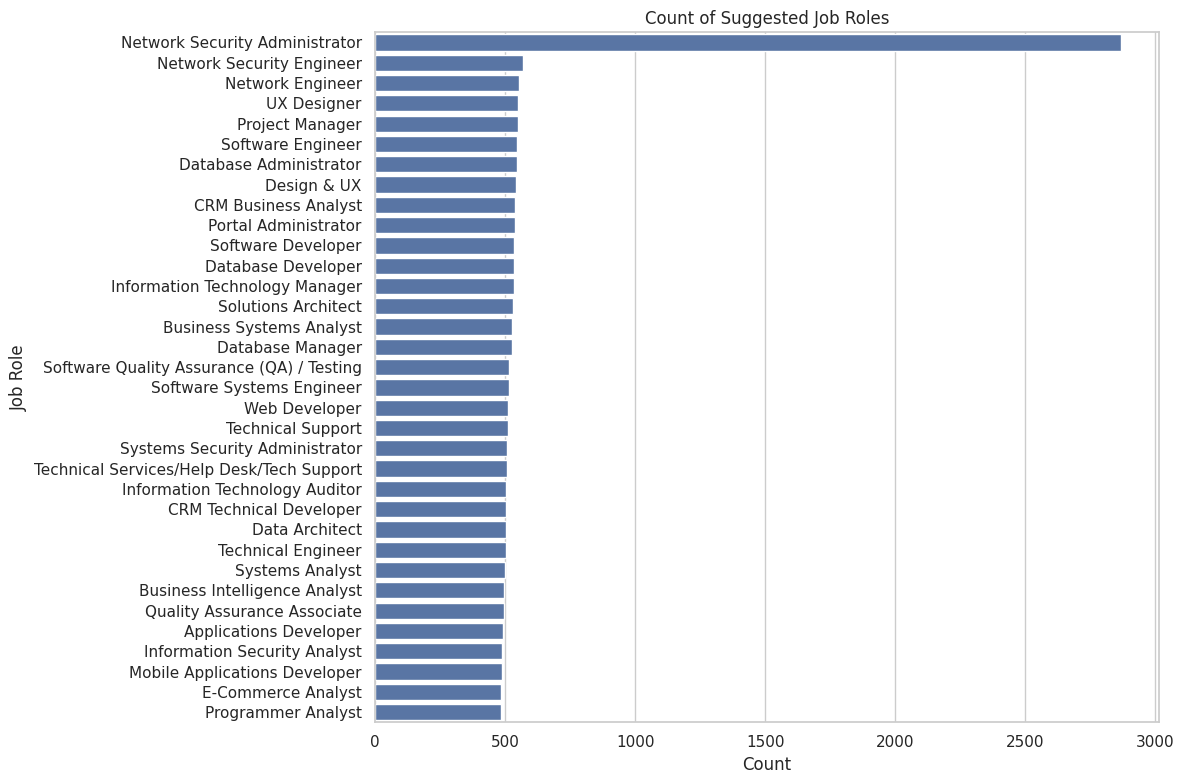

Generated bar chart for 'Suggested Job Role'.


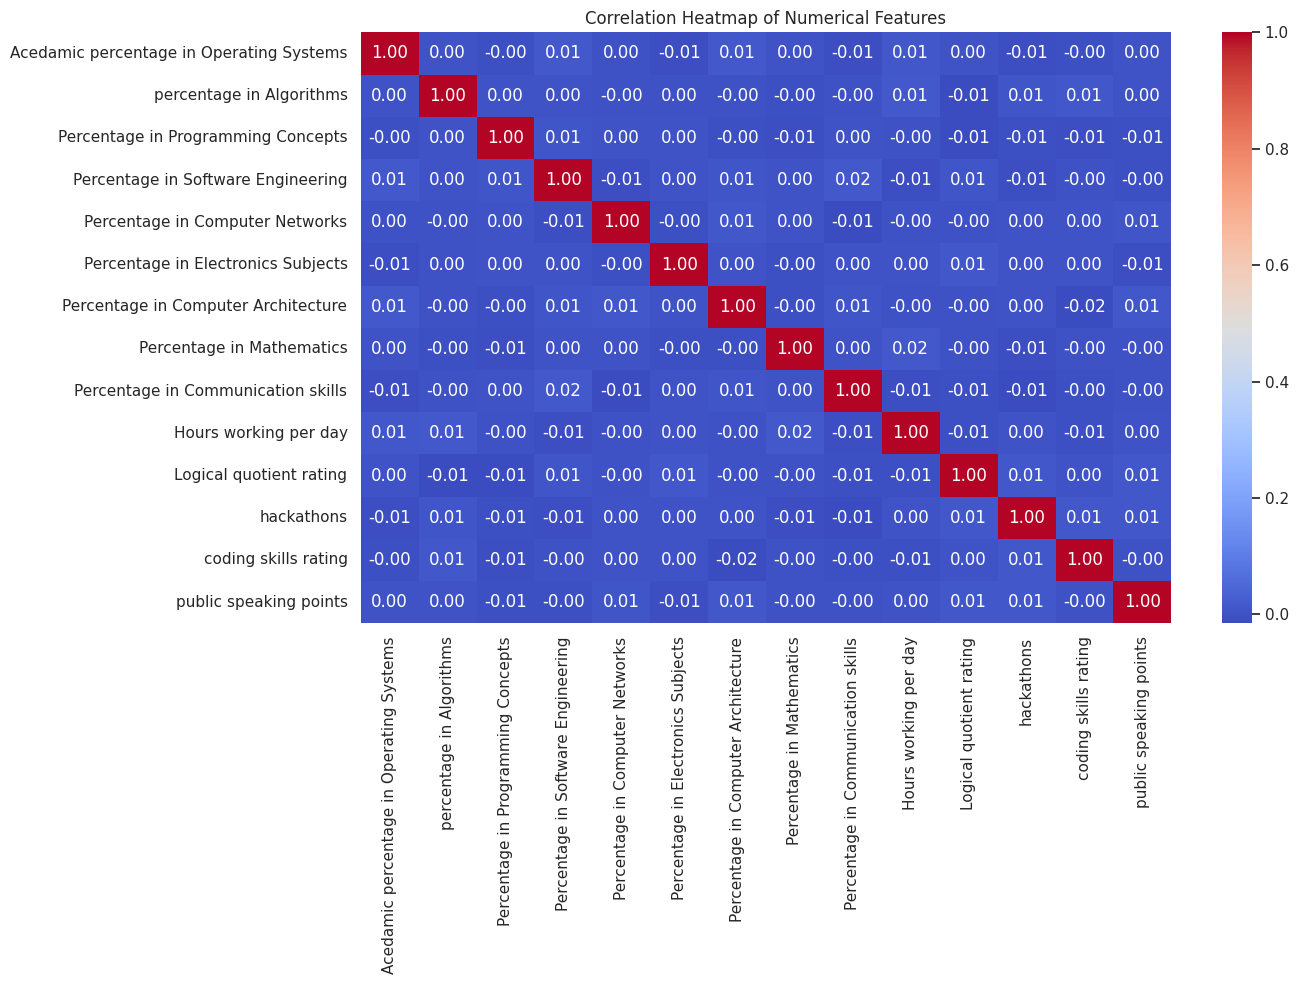

Generated correlation heatmap.


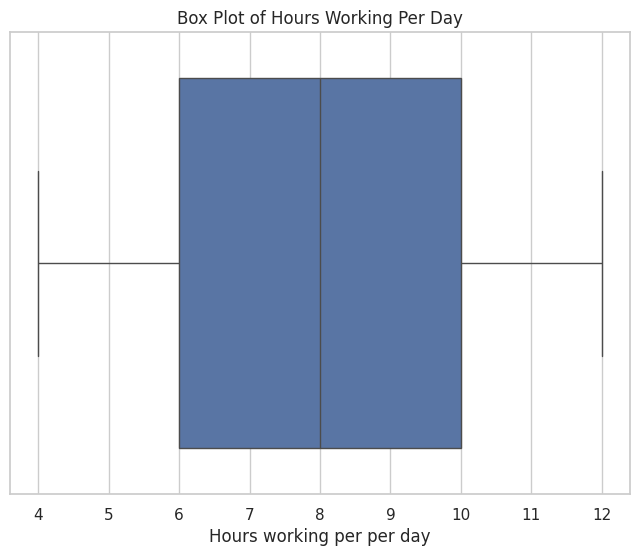

Generated box plot for 'Hours working per day'.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

try:
    df = pd.read_csv('roo_data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'roo_data.csv' not found. Please check the file path.")
    exit()

print("\nOriginal Data Head:")
print(df.head())
print("\nOriginal Data Info:")
df.info()
print("\nOriginal Data Description:")
print(df.describe())

df_noisy = df.copy()
noise_fraction = 0.1

total_cells = np.prod(df_noisy.shape)
noisy_cells = int(total_cells * noise_fraction)

random_rows = np.random.randint(0, df_noisy.shape[0], size=noisy_cells)
random_cols = np.random.randint(0, df_noisy.shape[1], size=noisy_cells)

for i in range(noisy_cells):
    if i % 2 == 0:
        df_noisy.iloc[random_rows[i], random_cols[i]] = np.nan
    else:
        df_noisy.iloc[random_rows[i], random_cols[i]] = ''

print(f"\nAdded noise to {noisy_cells} cells.")
print("Noisy Data Head:")
print(df_noisy.head())
print("\nMissing values in the noisy dataset:")
print(df_noisy.isnull().sum())

print("\n Cleaning the Noisy Dataset")

df_cleaned = df_noisy.replace('', np.nan)
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

for col in numerical_cols:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)

print("\nDataset after cleaning:")
print(df_cleaned.head())
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

print("\n Performing EDA on the Cleaned Dataset ")
sns.set(style="whitegrid")

# a) Distribution of a Numerical Column (e.g., 'Logical quotient rating')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Logical quotient rating'], kde=True, bins=10)
plt.title('Distribution of Logical Quotient Rating')
plt.xlabel('Logical Quotient Rating')
plt.ylabel('Frequency')
plt.show()
print("\nGenerated histogram for 'Logical quotient rating'.")


# b) Count of a Categorical Column (e.g., 'Suggested Job Role')
plt.figure(figsize=(12, 8))
sns.countplot(y='Suggested Job Role', data=df_cleaned, order = df_cleaned['Suggested Job Role'].value_counts().index)
plt.title('Count of Suggested Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()
print("Generated bar chart for 'Suggested Job Role'.")


# c) Correlation Heatmap for Numerical Columns
plt.figure(figsize=(14, 10))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
print("Generated correlation heatmap.")


# d) Box plot to check for outliers (e.g., 'Hours working per day')
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Hours working per day'])
plt.title('Box Plot of Hours Working Per Day')
plt.xlabel('Hours working per per day')
plt.show()
print("Generated box plot for 'Hours working per day'.")